
By Rawan AlNafesah

# موسم الرياض


# Project Description 

# Project Contents

# 1-Removing the Noise
# 2-Classifcation based on lexicons 
# 3-Text Cleaning 
# 4-Normlization 
# 5-Toknization 
# 6-Stopwords
# 5-Sentiment Classification 
# 6-Topic Modling 

# Data Loading  

In [1]:

import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/rawan/Desktop/last/tweet_text9.csv')

# Data Cleaning and prepartion 

In [2]:
clean_df = df.dropna()

In [3]:
# Remove nosiy tweets
noise=["كود خصم","خصومات","كوبون","تخفيضات","العقارات","فريق متخص","لملاك","ملاك","عقارات","جلب الحبيب","فك السحر"]

In [4]:
def remove_noise(tweet):
    label="ok"
    for word in noise:
        if word in tweet:
            label="noise"
    return label

In [5]:
# apply the method
df["is Noise"] = df['Tweets'].apply(lambda x: remove_noise(str(x)))

In [6]:
# remove the noise
df=df[df["is Noise"]!="noise"]

# classification base on lexican 

In [7]:
pos_list=pd.read_csv('C:/Users/rawan/Desktop/last/pos.csv')
neg_list=pd.read_csv('C:/Users/rawan/Desktop/last/neg.csv')

In [8]:

def pos_sentiment(tweet):
    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in pos_list:
        
        if word in tweet:
            count+=1
    
    return count

In [9]:
pos_list=pos_list["word"].values.tolist()
#apply the method to the data
df["pos_count"] = df["Tweets"].apply(lambda x: pos_sentiment(str(x)))

In [10]:
neg_list=neg_list["word"].values.tolist()

In [11]:
def neg_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for word in neg_list:
        if word in tweet:
            count+=1
               
    return count

In [12]:
#apply the method to the data
df["neg_count"] = df['Tweets'].apply(lambda x: neg_sentiment(str(x)))

In [13]:
def tweet_sentiment(tweet):
    range=3
    pos_sent=pos_sentiment(tweet)
    
    neg_sent=neg_sentiment(tweet)
    
    if pos_sent > neg_sent:
        label = "Positive"
    
    elif pos_sent < neg_sent :
        label = "Negative"
    else:
        label = "Neutral" 
   
   
    return label

In [14]:

df["sentiment"] = df['Tweets'].apply(lambda x: tweet_sentiment(str(x)))

In [15]:
# Q: How many tweets have positive sentiment and how many have negative sentiment
tweets_by_sentiment = df['sentiment'].value_counts()

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import csv
import re # for regular expression
import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

# Text Cleaning 

In [17]:

# remove punctuations علامات الترقيم  

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# Normlization 

In [18]:
def normalize_arabic(text):
    
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ؤ", "و", text)

    return text

In [19]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [20]:
#start processing the tweet 
def processPost(tweet,stemmer):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    tweet = re.sub(r'_', ' ', tweet)
    tweet = re.sub(r'\n', ' ', tweet)
    tweet = re.sub(r'[a-z,A-Z]', '', tweet)
    tweet = re.sub(r'\d', '', tweet)
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    # normalize the tweet
    #check if the word in the dictionary list (it have two letters as part of the word)
    tweet= normalize_arabic(tweet)
    tweet = stemmer.stem(tweet)
    #remove numbers
    tweet = ''.join(i for i in tweet if not i.isdigit())
    
    #remove english letters
    tweet= re.sub(r'[a-z]+'," ", tweet)
    tweet= re.sub(r'[A-Z]+'," ", tweet)
    
    return tweet
    

In [21]:
from nltk.stem.isri import ISRIStemmer
stemmer = ISRIStemmer()


In [22]:
df["clean text"] = df['Tweets'].apply(lambda x: processPost(x,stemmer))

# Removing the Emojie 

In [23]:
# https://stackoverflow.com/a/49146722/330558
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [24]:
df["clean text"] = df['clean text'].apply(lambda x: remove_emoji(x))

# Tokenization 

In [25]:
tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df["clean text"].apply(tokenizer.tokenize)

In [26]:
# Q: How many tweets have positive sentiment and how many have negative sentiment
tweets_by_sentiment = df['sentiment'].value_counts()

In [27]:
tweets_by_sentiment

Positive    805
Negative    181
Neutral       5
Name: sentiment, dtype: int64

In [28]:
df.sample(10)

,User,Location,Tweets,is Noise,pos_count,neg_count,sentiment,clean text,tokens
849,hafsa03530132,المملكة العربية السعودية,RT @1Cash9999: ترقبونا الليلة في السحب الثانية...,ok,74,60,Positive,ترقبونا اليله في السحب الثانيه علما بالحساب ...,"[ترقبونا, اليله, في, السحب, الثانيه, علما, بال..."
218,Nada_nnn4,Gaza,"RT @RTarabic: الفنانة اللبنانية إليسا تتصدر ""ا...",ok,63,42,Positive,الفنانه البنانيه اليسا تصدر الترند في موسم ال...,"[الفنانه, البنانيه, اليسا, تصدر, الترند, في, م..."
770,ajoker766,NaN,RT @1Cash9999: ترقبونا الليلة في السحب الثانية...,ok,74,60,Positive,ترقبونا اليله في السحب الثانيه علما بالحساب ...,"[ترقبونا, اليله, في, السحب, الثانيه, علما, بال..."
336,Sa7khs,اللهم ارحم فيصل بداح السهلي,RT @SaudiFalconClub: نتائج الشوط الخامس\nمحترف...,ok,74,42,Positive,نتائج الشوط الخامس محترفين سعودين لفئه جير شا...,"[نتائج, الشوط, الخامس, محترفين, سعودين, لفئه, ..."
277,Safiah88898i,"الرياض, المملكة العربية السعودية",RT @JeweleryMansour: مين يستاهل الذهب🤩؟\nمنشن ...,ok,90,11,Positive,مين يستاهل الذهب منشن شخص تهديه الذهب البحري...,"[مين, يستاهل, الذهب, منشن, شخص, تهديه, الذهب, ..."
333,leader_1420,NaN,RT @1Cash9999: ترقبونا الليلة في السحب الثانية...,ok,74,60,Positive,ترقبونا اليله في السحب الثانيه علما بالحساب ...,"[ترقبونا, اليله, في, السحب, الثانيه, علما, بال..."
838,ammhmd65924787,NaN,RT @1Cash9999: ترقبونا الليلة في السحب الثانية...,ok,74,60,Positive,ترقبونا اليله في السحب الثانيه علما بالحساب ...,"[ترقبونا, اليله, في, السحب, الثانيه, علما, بال..."
498,kahledjeddah,"جدة, المملكة العربية السعودية",جايكم جايكم 😍🔥🔥\n\n#موسم_الرياض #ونترلاند ht...,ok,24,16,Positive,جايكم جايكم موسم الرياض ونترلاند,"[جايكم, جايكم, موسم, الرياض, ونترلاند]"
513,7amoodehkh,Hashemite Kingdom of Jordan,RT @RotanaLive: نجاح مبهر لحفل #اليسا و #الشاب...,ok,92,16,Positive,نجاح مبهر لحفل اليسا و الشاب خالد مع هيئه الت...,"[نجاح, مبهر, لحفل, اليسا, و, الشاب, خالد, مع, ..."
667,Dody66625319,NaN,"RT @MBCinaWeek: لقاء مع أخطبوط العود ""عبادي ال...",ok,58,12,Positive,لقاء مع اخطبوط العود عبادي الجوهر خلال تواجده...,"[لقاء, مع, اخطبوط, العود, عبادي, الجوهر, خلال,..."


<AxesSubplot:title={'center':' The Number of  Riyadh Season tweets Based on Sentiment Analysis '}, xlabel='Sentiment', ylabel='Number of tweets'>

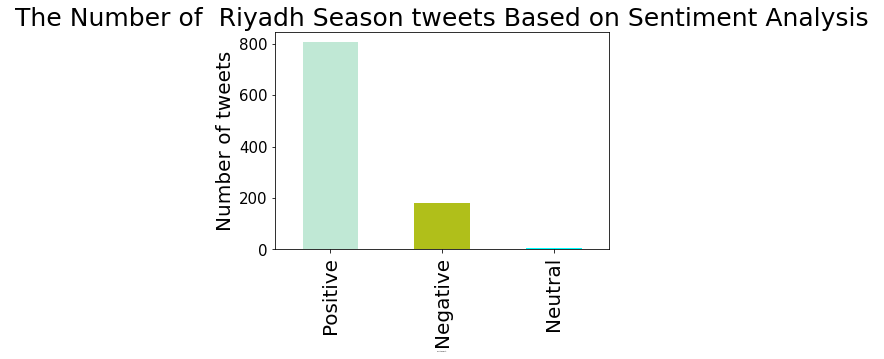

In [29]:

# visualize the results 
fig, ax = plt.subplots()
color=['#C0E8D5','#B0BF1A','#00FFFF']

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel('Sentiment', fontsize=2, color = 'black' )
ax.set_ylabel('Number of tweets' , fontsize=20 , color = 'black')

ax.set_title(' The Number of  Riyadh Season tweets Based on Sentiment Analysis ' ,fontsize=25,color = 'black' )

tweets_by_sentiment.plot(ax=ax, kind='bar',color=color)

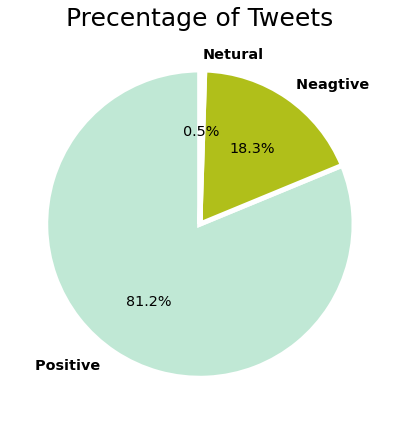

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
labels=['Positive ','Neagtive ','Netural']
color=['#C0E8D5','#B0BF1A','#00FFFF']
patches, texts, pcts = ax.pie(
    tweets_by_sentiment, labels=labels,autopct='%.1f%%',
    wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90, colors=color)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='Black')
plt.setp(texts, fontweight='bold',color="Black")
ax.set_title('Precentage of Tweets', fontsize=25, color="Black")
plt.tight_layout()

# Removing the Stop words 

In [31]:
# three stop words dataset 
from nltk.tokenize import word_tokenize
file1 = open('C:/Users/rawan/Downloads/stop_words_arabic(1).txt', 'r', encoding='utf-8')
file2 = open('C:/Users/rawan/Downloads/arabic-stop-words-master/arabic-stop-words-master/list.txt', 'r', encoding='utf-8')
stopwords_arabic = file1.read().splitlines()
stopwords_arabic2 = file2.read().splitlines()

In [32]:
#3 ed dataset of Stopword
stopwords_arabic3 = stopwords.words('arabic')
stopwords_arabic4 = ['عبر' , 'بكل','انا']



In [33]:
stopwords_list=stopwords_arabic3+stopwords_arabic+stopwords_arabic2+stopwords_arabic4


In [34]:
df["stop"] = df["tokens"].apply(lambda x: [item for item in x if item not in stopwords_list])

# Most Frequent Words 

In [35]:

all_words = [word for tokens in df["stop"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["stop"]]

VOCAB = sorted(list(set(all_words)))
# count the number of words
word_counter = Counter(all_words)

In [36]:
word_counter

Counter({'البوليفارد': 25,
         'موسم': 512,
         'الرياض': 567,
         'فوازير': 44,
         'طيران': 56,
         'اديل': 57,
         'مكان': 45,
         'شيء': 33,
         'نادر': 30,
         'شبيه': 30,
         'ماهو': 31,
         'شروط': 24,
         'المسابقه': 24,
         'سيتم': 24,
         'اختيار': 24,
         'فائز': 24,
         'شارك': 347,
         'بال': 23,
         'سفاري': 21,
         'ترقبونا': 323,
         'اليله': 338,
         'السحب': 334,
         'الثانيه': 325,
         'علما': 324,
         'بالحساب': 323,
         'جوالين': 323,
         'كاش': 323,
         'هدايا': 324,
         'مكن': 323,
         'نصيبك': 323,
         'رتويت': 338,
         'تا': 323,
         'اوفر': 4,
         'شهاده': 4,
         'ايلتس': 4,
         'جهد': 4,
         'وعناء': 4,
         'اختبار': 5,
         'متوفره': 5,
         'بسعر': 9,
         'ميز': 17,
         'بالدرجه': 4,
         'المطلوبه': 4,
         'تصلك': 4,
         'مكانك': 5,
         '

In [37]:
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

In [38]:
# using list comprehension
listToStr = ' '.join([str(elem) for elem in all_words])

In [39]:

import pandas as pd

from flair.embeddings import TransformerDocumentEmbeddings
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from gensim.models import LdaMulticore


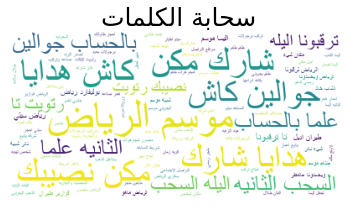

In [40]:
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
#...
reshaped_text = arabic_reshaper.reshape(listToStr)
data = get_display(reshaped_text) # add this line
WordCloud = WordCloud(font_path='arial', background_color='white',
                  mode='RGB', max_font_size=50, max_words=100,).generate(data)
c="سحابة الكلمات "
reshaped_textc = arabic_reshaper.reshape(c)
datac = get_display(reshaped_textc) # add this line
plt.title(datac,fontsize=25, color='black')
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

# Sentiment Classification

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [42]:
# remove the "Neutral" class
df=df[df['sentiment'] != "Neutral"]

In [43]:

# change values to numeric
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})

In [44]:
# idneitfy the data and the labels
data= df['clean text']
target= df['sentiment']


In [45]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape


(986, 2181)

In [46]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=0)

In [47]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(788, 2181) (198, 2181) (788,) (198,)


In [48]:
# create the classifer and fit the training data and lables
classifier_svm1 = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)
logreg_clf1 = LogisticRegression().fit(X_train,y_train)
KNN_model1 = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
#gnb = GaussianNB().fit(X_train, y_train)

print("SVM accuracy: %.2f"%classifier_svm1.score(X_test, y_test))
print("LogisticRegression accuracy: %.2f"%logreg_clf1.score(X_test, y_test))
print("KNN accuracy: %.2f"%KNN_model1.score(X_test, y_test))
#print("NB accuracy: %.2f"%gnb.score(X_test, y_test))

SVM accuracy: 0.94
LogisticRegression accuracy: 0.90
KNN accuracy: 0.88


In [49]:
from sklearn.metrics import classification_report
svm_pred = classifier_svm1.predict(X_test)
logreg_clf_pred=logreg_clf1.predict(X_test)
KNN_model_pred=KNN_model1.predict(X_test)

print ("classification_report", metrics.classification_report(y_test, svm_pred))
print ("classification_report", metrics.classification_report(y_test, logreg_clf_pred))
print ("classification_report", metrics.classification_report(y_test, KNN_model_pred))

classification_report               precision    recall  f1-score   support

           0       1.00      0.69      0.82        39
           1       0.93      1.00      0.96       159

    accuracy                           0.94       198
   macro avg       0.96      0.85      0.89       198
weighted avg       0.94      0.94      0.93       198

classification_report               precision    recall  f1-score   support

           0       1.00      0.49      0.66        39
           1       0.89      1.00      0.94       159

    accuracy                           0.90       198
   macro avg       0.94      0.74      0.80       198
weighted avg       0.91      0.90      0.88       198

classification_report               precision    recall  f1-score   support

           0       0.70      0.67      0.68        39
           1       0.92      0.93      0.93       159

    accuracy                           0.88       198
   macro avg       0.81      0.80      0.80       198
weighted

# Topic Modling 

In [50]:
texts = [[word for word in str(document).split()] for document in all_words]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

In [51]:
#chang the number of topics here
no_topics = 10

# run LDA
lda = LdaMulticore(corpus, id2word=id2word, num_topics=no_topics ,alpha=0.5, eval_every=5)

In [52]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import os
import pyLDAvis# Visualize the topics
import pyLDAvis
import pyLDAvis.sklearn

#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
p = gensimvis.prepare(lda, corpus, id2word)

C:\Users\rawan\Anaconda3\rawan\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


# Topic Modeling Using LDA

In [53]:
p

C:\Users\rawan\Anaconda3\rawan\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.005929 -0.006519       1        1  10.056834
6     -0.008774  0.006648       2        1  10.048946
7      0.007500  0.003687       3        1  10.037147
8     -0.005101 -0.002538       4        1  10.003915
4      0.004875 -0.008292       5        1   9.994832
2     -0.000349  0.003292       6        1   9.991169
1      0.001297  0.002671       7        1   9.984384
9      0.006168  0.002994       8        1   9.983791
0     -0.001165 -0.000601       9        1   9.968072
3      0.001480 -0.001341      10        1   9.930911, topic_info=         Term        Freq       Total Category  logprob  loglift
27      هدايا  279.000000  279.000000  Default  30.0000  30.0000
25     جوالين  278.000000  278.000000  Default  29.0000  29.0000
1        موسم  439.000000  439.000000  Default  28.0000  28.0000
23       علما  278.000000  278.000000  Default  27.0000  27.0000
20      اليله  292.000000  292.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
90       رياض    5.488817   61.161776  Topic10  -5.4280  -0.1013
5        اديل    4.765216   49.940468  Topic10  -5.5693  -0.0400
89   بوليفارد    5.555960   64.400993  Topic10  -5.4158  -0.1407
158      خالد    3.667859   36.130176  Topic10  -5.8311   0.0220
392       طقم    3.363615   43.052321  Topic10  -5.9176  -0.2399

[648 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
92        1  0.080148   احجز
92        2  0.080148   احجز
92        3  0.080148   احجز
92        4  0.080148   احجز
92        5  0.080148   احجز
...     ...       ...    ...
576       7  0.129411   يوجد
576       8  0.129411   يوجد
576       9  0.129411   يوجد
858       1  0.231718  يومنا
858      10  0.231718  يومنا

[1820 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 8, 9, 5, 3, 2, 10, 1, 4])

# Thanks